In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 23)
Test: (4398, 22)


In [3]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# NaN

## Train

In [4]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
1,belongs_to_collection,2396,0.798667
4,homepage,2054,0.684667
17,tagline,597,0.199000
19,Keywords,276,0.092000
11,production_companies,156,0.052000
12,production_countries,55,0.018333
15,spoken_languages,20,0.006667
21,crew,16,0.005333
20,cast,13,0.004333
8,overview,8,0.002667


In [5]:
drop_cols = ['belongs_to_collection', 'homepage', # many NaNs
             'overview', 'tagline', 'title', 'original_title', # NLP
             'poster_path', 'imdb_id'] # unused

df_train.drop(drop_cols, axis = 1, inplace = True)
df_test.drop(drop_cols, axis = 1, inplace = True)

print('Train:', df_train.shape)
print('Test:', df_test.shape)

Train: (3000, 15)
Test: (4398, 14)


In [6]:
nan_series = df_train.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_train.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
11,Keywords,276,0.092000
5,production_companies,156,0.052000
6,production_countries,55,0.018333
9,spoken_languages,20,0.006667
13,crew,16,0.005333
12,cast,13,0.004333
2,genres,7,0.002333
8,runtime,2,0.000667
0,id,0,0.000000
1,budget,0,0.000000


In [7]:
df_train['Keywords'].fillna('[]', inplace = True)
df_train['production_companies'].fillna('[]', inplace = True)
df_train['production_countries'].fillna('[]', inplace = True)
df_train['spoken_languages'].fillna('[]', inplace = True)
df_train['crew'].fillna('[]', inplace = True)
df_train['cast'].fillna('[]', inplace = True)
df_train['genres'].fillna('[]', inplace = True)

df_train['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)

df_train.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64

## Test

In [8]:
nan_series = df_test.isna().sum()
nan_df = pd.DataFrame({'features': nan_series.index, 'total': nan_series.values})
nan_df['perc'] = nan_df['total'] / df_test.shape[0]
nan_df.sort_values(['perc'], ascending = False)

,features,total,perc
11,Keywords,393,0.089359
5,production_companies,258,0.058663
6,production_countries,102,0.023192
9,spoken_languages,42,0.009550
13,crew,22,0.005002
2,genres,16,0.003638
12,cast,13,0.002956
8,runtime,4,0.000910
10,status,2,0.000455
7,release_date,1,0.000227


In [9]:
df_test['Keywords'].fillna('[]', inplace = True)
df_test['production_companies'].fillna('[]', inplace = True)
df_test['production_countries'].fillna('[]', inplace = True)
df_test['spoken_languages'].fillna('[]', inplace = True)
df_test['crew'].fillna('[]', inplace = True)
df_test['cast'].fillna('[]', inplace = True)
df_test['genres'].fillna('[]', inplace = True)

df_test['runtime'].fillna(df_train['runtime'].mean().item(), inplace = True)
df_test['status'].fillna('Released', inplace = True)
df_test['status'].replace('Post Production', 'Released', inplace = True)

df_test.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
dtype: int64

In [10]:
df_test[df_test['release_date'].isna()]

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew
828,3829,0,"[{'id': 18, 'name': 'Drama'}]",en,0.009057,[],[],NaN,90.0,[],Released,[],[],[]


In [11]:
df_test['release_date'].fillna('03/20/01', inplace = True)
df_test.loc[828]

id                                               3829
budget                                              0
genres                  [{'id': 18, 'name': 'Drama'}]
original_language                                  en
popularity                                   0.009057
production_companies                               []
production_countries                               []
release_date                                 03/20/01
runtime                                            90
spoken_languages                                   []
status                                       Released
Keywords                                           []
cast                                               []
crew                                               []
Name: 828, dtype: object

## Merge sets

In [12]:
train_labels = df_train.pop('revenue')
df_full = pd.concat([df_train, df_test], keys = ['train', 'test'])
df_full.shape

(7398, 14)

In [13]:
df_full.head()

id    budget                                             genres  \
train 0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
      1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
      2   3   3300000                      [{'id': 18, 'name': 'Drama'}]   
      3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
      4   5         0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

        original_language  popularity  \
train 0                en    6.575393   
      1                en    8.248895   
      2                en   64.299990   
      3                hi    3.174936   
      4                ko    1.148070   

                                      production_companies  \
train 0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
      1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
      2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
      3                                                 []   
      4                                                 []   

                                      production_countries release_date  \
train 0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
      1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   
      2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14   
      3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12   
      4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   

         runtime                                   spoken_languages    status  \
train 0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      1    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      2    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      3    122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
      4    118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                                  Keywords  \
train 0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
      1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
      2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
      3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
      4                                                 []   

                                                      cast  \
train 0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
      1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
      2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
      3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
      4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                      crew  
train 0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  
      1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  
      2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  
      3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  
      4  [{'credit_id': '52fe464b9251416c75073b43', 'de...

# Categorical Features

In [14]:
df_features = df_full[['id', 'budget', 'original_language', 'popularity', 'runtime', 'release_date', 'status']]
df_features.head()

id    budget original_language  popularity  runtime release_date  \
train 0   1  14000000                en    6.575393     93.0      2/20/15   
      1   2  40000000                en    8.248895    113.0       8/6/04   
      2   3   3300000                en   64.299990    105.0     10/10/14   
      3   4   1200000                hi    3.174936    122.0       3/9/12   
      4   5         0                ko    1.148070    118.0       2/5/09   

           status  
train 0  Released  
      1  Released  
      2  Released  
      3  Released  
      4  Released

## Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_features['original_language'] = le.fit_transform(df_features['original_language'])
df_features['status'] = le.fit_transform(df_features['status'])

## Time Features

In [16]:
df_features['release_date'] = pd.to_datetime(df_features['release_date'])
df_features['release_year'] = df_features['release_date'].dt.year
df_features['release_month'] = df_features['release_date'].dt.month
df_features['release_quarter'] = df_features['release_date'].dt.quarter
df_features.drop(['release_date'], axis = 1, inplace = True)

df_features.head()

id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  
train 0          2015              2                1  
      1          2004              8                3  
      2          2014             10                4  
      3          2012              3                1  
      4          2009              2                1

## Production Companies

In [43]:
from ast import literal_eval

def extract_dict(dict_str):
    dict_res = dict_str.replace('[', '').replace(']', '')
    dict_res = dict_res.replace('}, {', '};{')
    dict_res = dict_res.split(';')
    return dict_res

def get_cat_values(feature, value_name):
    value_list = set()
    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = extract_dict(obs)
        for item in item_dict:
            value_list.add(literal_eval(item)[value_name].lower())
    print("Feature: {} - Number of values: {}".format(feature, len(value_list)))
    return value_list

def get_value_frenquency(feature, value_name, value_list):
    df_counts = pd.DataFrame(index = value_list)
    df_counts['counts'] = 0

    for obs in df_full[feature]:
        if obs == '[]':
            continue
        item_dict = extract_dict(obs)
        for item in item_dict:
            item_id = literal_eval(item)[value_name].lower()
            df_counts['counts'].loc[item_id] += 1
            
    return df_counts

In [21]:
production_companies = get_cat_values('production_companies', 'name')

Feature: production_companies - Number of values: 7069


In [23]:
# company_counts = pd.DataFrame(index = production_companies)
# company_counts['counts'] = 0

# for item in df_full['production_companies']:
#     if item == '[]':
#         continue
#     companies_dict = extract_dict(item)
#     for company in companies_dict:
#         company_id = literal_eval(company)['name'].lower()
#         company_counts['counts'].loc[company_id] += 1
        
# company_counts.sort_values('counts', ascending = False).head(10)

In [20]:
# company_counts.sort_values('counts', ascending = False).to_csv('company_counts.csv')

In [24]:
companies = pd.read_csv('company_counts_cleaned.csv')
companies = companies[companies['counts'] > 50]
companies = list(companies['Unnamed: 0'])
print(len(companies))
companies

38


['warner',
 'universal',
 'paramount',
 'columbia pictures',
 '20th century fox',
 '21st century',
 'twentieth century fox',
 'disney',
 'metro-goldwyn-mayer',
 'new line',
 'canal',
 'touchstone pictures',
 'fox',
 'dreamworks',
 'tristar',
 'lions gate',
 'lionsgate',
 'miramax',
 'relativity media',
 'united artists',
 'dune',
 'france',
 'village roadshow',
 'regency',
 'sony',
 'amblin',
 'bbc',
 'dc comics',
 'dc entertainment',
 'studiocanal',
 'orion pictures',
 'working title films',
 'dimension films',
 'summit entertainment',
 'hollywood pictures',
 'imagine',
 'marvel',
 'ingenious']

In [25]:
def add_features(prefix, name_list):
    for name in name_list:
        col_name = prefix + '_' + name
        df_features[col_name] = 0

In [26]:
add_features('pc', companies)
    
print(df_features.shape)
df_features.head()

(7398, 47)


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  \
train 0             0             0                     0   
      1             0             0                     0   
      2             0             0                     0   
      3             0             0                     0   
      4             0             0                     0   

         pc_20th century fox  pc_21st century  pc_twentieth century fox  \
train 0                    0                0                         0   
      1                    0                0                         0   
      2                    0                0                         0   
      3                    0                0                         0   
      4                    0                0                         0   

         pc_disney  pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0          0                       0            0         0   
      1          0                       0            0         0   
      2          0                       0            0         0   
      3          0                       0            0         0   
      4          0                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_lions gate  pc_lionsgate  pc_miramax  pc_relativity media  \
train 0              0             0           0                    0   
      1              0             0           0                    0   
      2              0             0           0                    0   
      3              0             0           0                    0   
      4              0             0           0                    0   

         pc_united artists  pc_dune  pc_france  pc_village roadshow  \
train 0                  0        0          0                    0   
      1                  0        0          0                    0   
      2                  0        0          0                    0   
      3                  0        0          0                    0   
      4                  0        0          0                    0   

         pc_regency  pc_sony  pc_amblin  pc_bbc  pc_dc comics  \
train 0           0        0          0       0             0   
      1           0        0          0       0             0   
      2           0        0          0       0             0   
      3           0        0          0       0             0   
      4           0        0          0       0             0   

         pc_dc entertainment  pc_studiocanal  pc_orion pictures  \
train 0                    0               0                  0   
      1                    0               0                  0   
      2                    0               0     

In [27]:
from time import time

t = time()
count = 0
for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    for comp in companies:
        col_name = 'pc_' + comp
        if comp in row['production_companies'].lower():
            df_features[col_name].loc[index] = 1
            
print()
t = time() - t
print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 156.95255279541016


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  \
train 0             0             1                     0   
      1             0             0                     0   
      2             0             0                     0   
      3             0             0                     0   
      4             0             0                     0   

         pc_20th century fox  pc_21st century  pc_twentieth century fox  \
train 0                    0                0                         0   
      1                    0                0                         0   
      2                    0                0                         0   
      3                    0                0                         0   
      4                    0                0                         0   

         pc_disney  pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0          0                       1            0         0   
      1          1                       0            0         0   
      2          0                       0            0         0   
      3          0                       0            0         0   
      4          0                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_lions gate  pc_lionsgate  pc_miramax  pc_relativity media  \
train 0              0             0           0                    0   
      1              0             0           0                    0   
      2              0             0           0                    0   
      3              0             0           0                    0   
      4              0             0           0                    0   

         pc_united artists  pc_dune  pc_france  pc_village roadshow  \
train 0                  1        0          0                    0   
      1                  0        0          0                    0   
      2                  0        0          0                    0   
      3                  0        0          0                    0   
      4                  0        0          0                    0   

         pc_regency  pc_sony  pc_amblin  pc_bbc  pc_dc comics  \
train 0           0        0          0       0             0   
      1           0        0          0       0             0   
      2           0        0          0       0             0   
      3           0        0          0       0             0   
      4           0        0          0       0             0   

         pc_dc entertainment  pc_studiocanal  pc_orion pictures  \
train 0                    0               0                  0   
      1                    0               0                  0   
      2                    0               0     

In [28]:
df_features['pc_century_fox'] = df_features['pc_20th century fox'] | df_features['pc_21st century'] | df_features['pc_twentieth century fox']
df_features['pc_lions_gate'] = df_features['pc_lions gate'] | df_features['pc_lionsgate']
df_features['pc_dc'] = df_features['pc_dc comics'] | df_features['pc_dc entertainment']

df_features.drop(['pc_20th century fox', 'pc_21st century', 'pc_twentieth century fox',
                  'pc_lions gate', 'pc_lionsgate', 'pc_dc comics', 'pc_dc entertainment'],
                  axis = 1, inplace = True)

df_features.shape

(7398, 43)

## Production Countries

In [29]:
df_full['production_countries'].loc['train', 0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [30]:
production_countries = get_cat_values('production_countries', 'iso_3166_1')

Feature: production_countries - Number of values: 98


In [38]:
# production_countries_counts = pd.DataFrame(index = production_countries)
# production_countries_counts['counts'] = 0

# for item in df_full['production_countries']:
#     if item == '[]':
#         continue
#     countries_dict = extract_dict(item)
#     for country in countries_dict:
#         country_id = literal_eval(country)['iso_3166_1']
#         production_countries_counts['counts'].loc[country_id] += 1
        
# production_countries_counts.sort_values('counts', ascending = False).head(10)

In [45]:
# production_countries_counts.sort_values('counts', ascending = False).to_csv('production_countries_counts.csv')

In [33]:
production_countries_counts = pd.read_csv('production_countries_counts.csv')
production_countries_counts = production_countries_counts[production_countries_counts['counts'] >= 20]
top_production_countries = list(production_countries_counts['Unnamed: 0'])
top_production_countries

['US',
 'GB',
 'FR',
 'DE',
 'CA',
 'IN',
 'IT',
 'JP',
 'AU',
 'ES',
 'RU',
 'CN',
 'HK',
 'BE',
 'IE',
 'KR',
 'SE',
 'MX',
 'NL',
 'DK',
 'NZ',
 'CZ',
 'CH',
 'ZA',
 'NO',
 'BR',
 'AT']

In [34]:
add_features('pcn', top_production_countries)
print(df_features.shape)
df_features.head()

(7398, 70)


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

In [35]:
t = time()
count = 0

for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    if row['production_countries'] == '[]':
        continue
    countries_dict = extract_dict(row['production_countries'])
    for country in countries_dict:
        country_id = literal_eval(country)['iso_3166_1']
        if country_id in top_production_countries:
            col_name = 'pcn_' + country_id
            df_features[col_name].loc[index] = 1
            
print()
t = time() - t
print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 4m39s


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

## Genres

In [37]:
genres = get_cat_values('genres', 'name')
genres

Feature: genres - Number of values: 20


{'action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'foreign',
 'history',
 'horror',
 'music',
 'mystery',
 'romance',
 'science fiction',
 'thriller',
 'tv movie',
 'war',
 'western'}

In [40]:
add_features('genre', genres)
df_features.head()

id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

In [42]:
from time import time

t = time()
count = 0
for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    for genre in genres:
        col_name = 'genre_' + genre
        if genre in row['genres'].lower():
            df_features[col_name].loc[index] = 1
            
print()
t = time() - t
print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 8m32s


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

## Spoken Language

In [49]:
df_full['spoken_languages'].loc['train', 0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [53]:
spoken_languages = get_cat_values('spoken_languages', 'iso_639_1')
spoken_languages_counts = get_value_frenquency('spoken_languages', 'iso_639_1', spoken_languages)
spoken_languages_counts.head(20)

Feature: spoken_languages - Number of values: 98


,counts
ne,2
ta,52
ku,1
tl,8
ca,7
ro,23
hy,4
te,17
km,3
pt,100


In [55]:
spoken_languages_counts.sort_values('counts', ascending = False).to_csv('spoken_languages.csv')

In [59]:
spoken_languages_counts = pd.read_csv('spoken_languages.csv')
spoken_languages_counts = spoken_languages_counts[spoken_languages_counts['counts'] >= 50]
spoken_languages_counts = list(spoken_languages_counts['Unnamed: 0'])
spoken_languages_counts

['en',
 'fr',
 'es',
 'de',
 'ru',
 'it',
 'ja',
 'zh',
 'hi',
 'ar',
 'pt',
 'cn',
 'ko',
 'pl',
 'la',
 'hu',
 'cs',
 'th',
 'ta',
 'sv']

In [60]:
add_features('spl', spoken_languages_counts)
print(df_features.shape)
df_features.head()

(7398, 110)


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

In [63]:
t = time()
count = 0

for index, row in df_full.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, end = ' ')
    if row['spoken_languages'] == '[]':
        continue
    spoken_languages_dict = extract_dict(row['spoken_languages'])
    for lang in spoken_languages_dict:
        lang_id = literal_eval(lang)['iso_639_1']
        if lang_id in spoken_languages_counts:
            col_name = 'spl_' + lang_id
            df_features[col_name].loc[index] = 1
            
print()
t = time() - t
print('Time elapsed: {}m{}s'.format(int(t // 60), int(t % 60)))
df_features.head()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 
Time elapsed: 4m48s


id    budget  original_language  popularity  runtime  status  \
train 0   1  14000000                 10    6.575393     93.0       0   
      1   2  40000000                 10    8.248895    113.0       0   
      2   3   3300000                 10   64.299990    105.0       0   
      3   4   1200000                 16    3.174936    122.0       0   
      4   5         0                 24    1.148070    118.0       0   

         release_year  release_month  release_quarter  pc_warner  \
train 0          2015              2                1          0   
      1          2004              8                3          0   
      2          2014             10                4          0   
      3          2012              3                1          0   
      4          2009              2                1          0   

         pc_universal  pc_paramount  pc_columbia pictures  pc_disney  \
train 0             0             1                     0          0   
      1             0             0                     0          1   
      2             0             0                     0          0   
      3             0             0                     0          0   
      4             0             0                     0          0   

         pc_metro-goldwyn-mayer  pc_new line  pc_canal  \
train 0                       1            0         0   
      1                       0            0         0   
      2                       0            0         0   
      3                       0            0         0   
      4                       0            0         0   

         pc_touchstone pictures  pc_fox  pc_dreamworks  pc_tristar  \
train 0                       0       0              0           0   
      1                       0       0              0           0   
      2                       0       0              0           0   
      3                       0       0              0           0   
      4                       0       0              0           0   

         pc_miramax  pc_relativity media  pc_united artists  pc_dune  \
train 0           0                    0                  1        0   
      1           0                    0                  0        0   
      2           0                    0                  0        0   
      3           0                    0                  0        0   
      4           0                    0                  0        0   

         pc_france  pc_village roadshow  pc_regency  pc_sony  pc_amblin  \
train 0          0                    0           0        0          0   
      1          0                    0           0        0          0   
      2          0                    0           0        0          0   
      3          0                    0           0        0          0   
      4          0                    0           0        0          0   

         pc_bbc  pc_studiocanal  pc_orion pictures  pc_working title films  \
train 0       0               0                  0                       0   
      1       0               0                  0                       0   
      2       0               0                  0                       0   
      3       0               0                  0                       0   
      4       0               0                  0                       0   

         pc_dimension films  pc_summit entertainment  pc_hollywood pictures  \
train 0                   0                        0                      0   
      1                   0                        0                      0   
      2                   0                        0                      0   
      3                   0                        0                      0   
      4                   0                        0                      0   

         pc_imagine  pc_marvel  pc_ingenious  pc_century_fox  pc_lions_gate  \
train 0           0          0             0       

# Target

In [64]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

def plot_norm(col_name):
    sns.distplot(df_full[col_name], fit = norm)
    fig = plt.figure()
    
def log_transform(col_name, extract_zero = False):
    plot_norm(col_name)
    
    if extract_zero:
        df_full['temp'] = 0
        df_full.loc[df_full[col_name] > 0, 'temp'] = 1
        df_full.loc[df_full['temp'] == 1, col_name] = np.log(df_full[col_name])
        df_full.drop(['temp'], axis = 1, inplace = True)
    else:
        df_full[col_name] = np.log(df_full[col_name])
        
    plot_norm(col_name)

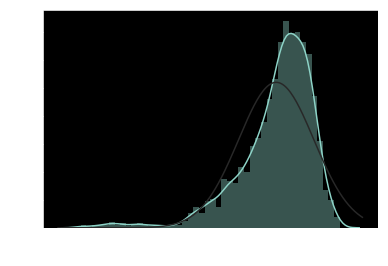

In [65]:
train_labels_log = np.log(train_labels)
sns.distplot(train_labels_log, fit = norm)

# Model

In [66]:
from sklearn.model_selection import train_test_split

train_set = df_features.loc['train']
train_set.drop(['id'], axis = 1, inplace = True)
test_set = df_features.loc['test']


x_train, x_val, y_train, y_val = train_test_split(train_set, train_labels_log, test_size = 0.2, random_state = 1)
print('Train:', x_train.shape, y_train.shape)
print('Val:', x_val.shape, y_val.shape)

Train: (2400, 109) (2400,)
Val: (600, 109) (600,)


In [67]:
import lightgbm as lgb
import gc

train_ds = lgb.Dataset(x_train, label = y_train)
val_ds = lgb.Dataset(x_val, label = y_val)

watchlist = [train_ds, val_ds]

params = {
    'learning_rate': 0.01, 
    'boosting': 'gbdt', 
    'objective': 'regression', 
    'max_depth': -1,
    'seed': 191, 
    'num_leaves': 31,
    'metric': 'rmse',
    'nthreads': 8,
    'lambda_l1': 0.005,
    'verbose': -1
}

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

gc.collect()

0

In [68]:
lgb_model = lgb.train(params, train_ds, 700,
                      valid_sets = watchlist, verbose_eval = 20)

[20]	training's rmse: 2.84144	valid_1's rmse: 2.54771
[40]	training's rmse: 2.62496	valid_1's rmse: 2.34624
[60]	training's rmse: 2.45518	valid_1's rmse: 2.20573
[80]	training's rmse: 2.32161	valid_1's rmse: 2.10666
[100]	training's rmse: 2.21779	valid_1's rmse: 2.03856
[120]	training's rmse: 2.13635	valid_1's rmse: 2.0002
[140]	training's rmse: 2.06876	valid_1's rmse: 1.97511
[160]	training's rmse: 2.01165	valid_1's rmse: 1.95886
[180]	training's rmse: 1.96303	valid_1's rmse: 1.94535
[200]	training's rmse: 1.92206	valid_1's rmse: 1.93661
[220]	training's rmse: 1.88439	valid_1's rmse: 1.93023
[240]	training's rmse: 1.85307	valid_1's rmse: 1.92539
[260]	training's rmse: 1.81812	valid_1's rmse: 1.91557
[280]	training's rmse: 1.78852	valid_1's rmse: 1.90966
[300]	training's rmse: 1.76257	valid_1's rmse: 1.91063
[320]	training's rmse: 1.7371	valid_1's rmse: 1.908
[340]	training's rmse: 1.71325	valid_1's rmse: 1.90298
[360]	training's rmse: 1.69055	valid_1's rmse: 1.90209
[380]	training's r

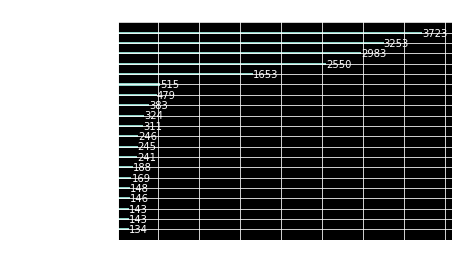

In [69]:
lgb.plot_importance(lgb_model, max_num_features = 20)

In [70]:
val_preds = lgb_model.predict(x_val)
rmsle(val_preds, y_val)

1.8797257778333096

# Test set

In [71]:
test_id = test_set.pop('id')
test_id.head()

0    3001
1    3002
2    3003
3    3004
4    3005
Name: id, dtype: int64

In [72]:
test_set.isna().sum().max()

0

In [73]:
preds = lgb_model.predict(test_set)
preds = np.exp(preds)
print(preds.shape)
preds

(4398,)


array([10767003.09918717,  1397745.16251931,  7640254.56160498, ...,
       60053939.01348427,  1972534.15731044,  1843240.97947208])

In [74]:
submission = pd.DataFrame({'id': test_id, 'revenue': preds})
submission.head()

,id,revenue
0,3001,1.076700e+07
1,3002,1.397745e+06
2,3003,7.640255e+06
3,3004,1.127556e+06
4,3005,6.947739e+05


In [75]:
submission.to_csv('submission.csv', index = False)